# `Lead Scoring Case Study`

### Project Brief
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage but only a few of them come out as paying customers at the last stage. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

###### The keys sections in this data analysis are:

1. Reading and understanding the data
2. Cleaning the data
3. Preparing the data for modelling
4. Modelling of the data
5. Determining optimum cut-off probability
6. Making predictions based on test dataset
7. Recommendations

## 1:- Reading and understanding the data

### Importing the required libraries

In [1029]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1030]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing CSV file

In [1031]:
df=pd.read_csv("C:/Users/Arindam/Downloads/Lead_scoring/Lead Scoring Assignment/Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### Checking the structure of the data

In [1032]:
df.shape

(9240, 37)

In [1033]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1034]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


The lead scoring data provided comprises 9240 rows and 37 columns.
The names of the columns in the dataset are - 'Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'.

In the above data, a model using logistic regression will be created using the target variable as the columnn 'Converted'.

## Cleaning the data

In [1035]:
#dropping the 'Prospect ID' column since there is another identifier column named 'Lead Number'

df = df.drop("Prospect ID", axis=1)

### Dealing with 'Select' values

In [1036]:
#printing out columns that contain 'Select' values

for i in df.columns:
    if df[i].values.any() == 'Select':
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [1037]:
# Replacing select with NaN for specialisation

df['Specialization'] = df['Specialization'].replace('Select',np.NaN)
df['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [1038]:
# Replacing select with NaN for City

df['City'] = df['City'].replace('Select',np.NaN)
df['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [1039]:
# Replacing select with NaN for How did you hear about X Education

df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select',np.NaN)
df['How did you hear about X Education'].unique()

array([nan, 'Word Of Mouth', 'Other', 'Online Search', 'Multiple Sources',
       'Advertisements', 'Student of SomeSchool', 'Email', 'Social Media',
       'SMS'], dtype=object)

In [1040]:
# Replacing select with NaN for Lead Profile

df['Lead Profile'] = df['Lead Profile'].replace('Select',np.NaN)
df['Lead Profile'].unique()

array([nan, 'Potential Lead', 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

### Checking and treating missing values

In [1041]:
# Checking for missing values

round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

How did you hear about X Education              78.46
Lead Profile                                    74.19
Lead Quality                                    51.59
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Index                      45.65
Asymmetrique Activity Index                     45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                 

##### Since some of the columns have a very high number of missing values, we will have to delete them as they might cause some skewness in the results of the analysis. We will delete the columns with 40% or more missing values.

In [1042]:
df=df.drop(['Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
            'Asymmetrique Profile Index','Asymmetrique Activity Index','How did you hear about X Education',
           'Lead Profile','City','Tags'], axis=1)

In [1043]:
# Checking for missing values

round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

Specialization                                  36.58
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [1044]:
# Checking for missing values

round(100*(df.isnull().sum(axis= 1))/len(df), 2).sort_values(ascending=False)

1131   0.06
5840   0.06
7847   0.06
1123   0.06
1124   0.06
       ... 
3725   0.00
7290   0.00
7289   0.00
3733   0.00
9239   0.00
Length: 9240, dtype: float64

### Imputing the missing values.

In [1045]:
# Imputing the NaN with the Mode() value for specilization

df['Specialization'].mode()
df['Specialization']=df['Specialization'].replace(np.NaN,"Finance Management")

In [1046]:
# Imputing the other with the Mode() value for What matters most to you in choosing a course'

df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace("Other","Better Career Prospects")

In [1047]:
# Imputing the NaN with the Mode() value for - What is your current occupation

df['What is your current occupation']=df['What is your current occupation'].replace(np.NaN,"Unemployed")

In [1048]:
# Imputing the NaN with the Mode() value for - Country

df['Country']=df['Country'].replace(np.NaN,"India")

In [1049]:
# Imputing the NaN with the Mean() for - TotalVisits

df['TotalVisits'].mean()
df['TotalVisits']=df['TotalVisits'].replace(np.NaN,df['TotalVisits'].mean())

In [1050]:
# Imputing the NaN with the Mean() for - Page Views Per Visit

df['Page Views Per Visit'].mean()
df['Page Views Per Visit']=df['Page Views Per Visit'].replace(np.NaN,df['Page Views Per Visit'].mean())

In [1051]:
# Imputing the NaN with the Mode() value for - Last Activity

df['Last Activity'].mode()
df['Last Activity']=df['Last Activity'].replace(np.NaN,"Email Opened")

In [1052]:
# Imputing the NaN with the Mode() value for - Lead Source

df['Lead Source'].mode()
df['Lead Source']=df['Lead Source'].replace(np.NaN,"Google")

### Checking for skewed data and substituting it accordingly

##### a - Checking for the values for each category in the categorical columns .
##### b -Clubbing the categorical values to lower the skewness
##### c -Deleting the columns with high skewness since gaving athe values concentrated to one category
##### d -Deleting the columns having too many categories

In [1053]:
df['What matters most to you in choosing a course'].value_counts(normalize = True)

Better Career Prospects     1.00
Flexibility & Convenience   0.00
Name: What matters most to you in choosing a course, dtype: float64

In [1054]:
df=df.drop(['What matters most to you in choosing a course'], axis=1)

In [1055]:
df['What is your current occupation'].value_counts(normalize = True)

Unemployed             0.90
Working Professional   0.08
Student                0.02
Other                  0.00
Housewife              0.00
Businessman            0.00
Name: What is your current occupation, dtype: float64

In [1056]:
df['What is your current occupation'] = df['What is your current occupation'].replace(['Businessman',
                                                   'Housewife']
                                                    ,"Other")
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', 'Working Professional', 'Other'],
      dtype=object)

In [1057]:
df['Country'].value_counts(normalize = True)

India                  0.97
United States          0.01
United Arab Emirates   0.01
Singapore              0.00
Saudi Arabia           0.00
United Kingdom         0.00
Australia              0.00
Qatar                  0.00
Hong Kong              0.00
Bahrain                0.00
France                 0.00
Oman                   0.00
unknown                0.00
Kuwait                 0.00
Nigeria                0.00
South Africa           0.00
Canada                 0.00
Germany                0.00
Sweden                 0.00
Ghana                  0.00
Asia/Pacific Region    0.00
Italy                  0.00
Philippines            0.00
Uganda                 0.00
Netherlands            0.00
Belgium                0.00
China                  0.00
Bangladesh             0.00
Tanzania               0.00
Russia                 0.00
Denmark                0.00
Sri Lanka              0.00
Liberia                0.00
Indonesia              0.00
Malaysia               0.00
Vietnam             

In [1058]:
df=df.drop(['Country'], axis=1)

In [1059]:
df['Last Activity'].value_counts(normalize = True)

Email Opened                   0.38
SMS Sent                       0.30
Olark Chat Conversation        0.11
Page Visited on Website        0.07
Converted to Lead              0.05
Email Bounced                  0.04
Email Link Clicked             0.03
Form Submitted on Website      0.01
Unreachable                    0.01
Unsubscribed                   0.01
Had a Phone Conversation       0.00
Approached upfront             0.00
View in browser link Clicked   0.00
Email Marked Spam              0.00
Email Received                 0.00
Resubscribed to emails         0.00
Visited Booth in Tradeshow     0.00
Name: Last Activity, dtype: float64

In [1060]:
#the values with extremely low variance can be clubbed together to form a new value 'Other'

df['Last Activity'] = df['Last Activity'].replace(['Converted to Lead',
                                                   'Email Link Clicked','Form Submitted on Website','Unreachable',
                                                   'Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Marked Spam','Email Received',
                                                   'Visited Booth in Tradeshow','Resubscribed to emails']
                                                    ,"Other")
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Other',
       'Olark Chat Conversation', 'Email Bounced', 'SMS Sent'],
      dtype=object)

In [1061]:
df['Lead Source'].value_counts(normalize = True)

Google              0.31
Direct Traffic      0.28
Olark Chat          0.19
Organic Search      0.12
Reference           0.06
Welingak Website    0.02
Referral Sites      0.01
Facebook            0.01
bing                0.00
google              0.00
Click2call          0.00
Press_Release       0.00
Social Media        0.00
Live Chat           0.00
welearnblog_Home    0.00
blog                0.00
youtubechannel      0.00
NC_EDM              0.00
WeLearn             0.00
Pay per Click Ads   0.00
testone             0.00
Name: Lead Source, dtype: float64

In [1062]:
#the values with extremely low variance can be clubbed together to form a new value 'Other'

df['Lead Source'] = df['Lead Source'].replace(['Pay per Click Ads','NC_EDM','testone',
                                                   'youtubechannel','blog','welearnblog_Home','WeLearn',
                                                   'Press_Release','Live Chat','Social Media',
                                                   'Click2call','bing','Facebook',
                                                   'Referral Sites','Welingak Website']
                                                    ,"Other")
df['Lead Source'] = df['Lead Source'].replace('google','Google')  
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Other', 'Reference'], dtype=object)

In [1063]:
df['Lead Origin'].value_counts(normalize = True)

Landing Page Submission   0.53
API                       0.39
Lead Add Form             0.08
Lead Import               0.01
Quick Add Form            0.00
Name: Lead Origin, dtype: float64

In [1064]:
df['Lead Origin'] = df['Lead Origin'].replace(['Quick Add Form','Lead Import'],"Other")
                                                 
df['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Other'],
      dtype=object)

In [1065]:
df['Do Not Email'].value_counts(normalize = True)

No    0.92
Yes   0.08
Name: Do Not Email, dtype: float64

In [1066]:
df=df.drop(['Do Not Email'], axis=1)

In [1067]:
df['Do Not Call'].value_counts(normalize = True)

No    1.00
Yes   0.00
Name: Do Not Call, dtype: float64

In [1068]:
df=df.drop(['Do Not Call'], axis=1)

In [1069]:
df['Last Notable Activity'].value_counts(normalize = True)

Modified                       0.37
Email Opened                   0.31
SMS Sent                       0.24
Page Visited on Website        0.03
Olark Chat Conversation        0.02
Email Link Clicked             0.02
Email Bounced                  0.01
Unsubscribed                   0.01
Unreachable                    0.00
Had a Phone Conversation       0.00
Email Marked Spam              0.00
Resubscribed to emails         0.00
View in browser link Clicked   0.00
Approached upfront             0.00
Form Submitted on Website      0.00
Email Received                 0.00
Name: Last Notable Activity, dtype: float64

In [1070]:
#the values with extremely low variance can be clubbed together to form a new value 'Other'

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Olark Chat Conversation',
                                                   'Email Link Clicked','Email Bounced','Unsubscribed','Unreachable',
                                                   'Had a Phone Conversation','Email Marked Spam','Email Received',
                                                   'Resubscribed to emails','Approached upfront','View in browser link Clicked',
                                                   'Form Submitted on Website']
                                                    ,"Other")
                   
df['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website', 'Other',
       'SMS Sent'], dtype=object)

In [1071]:
df['A free copy of Mastering The Interview'].value_counts(normalize = True)

No    0.69
Yes   0.31
Name: A free copy of Mastering The Interview, dtype: float64

In [1072]:
df['Search'].value_counts(normalize = True)

No    1.00
Yes   0.00
Name: Search, dtype: float64

In [1073]:
df=df.drop(['Search'], axis=1)

In [1074]:
df['Magazine'].value_counts(normalize = True)

No   1.00
Name: Magazine, dtype: float64

In [1075]:
df=df.drop(['Magazine'], axis=1)

In [1076]:
df['Newspaper Article'].value_counts(normalize = True)

No    1.00
Yes   0.00
Name: Newspaper Article, dtype: float64

In [1077]:
df=df.drop(['Newspaper Article'], axis=1)

In [1078]:
df['X Education Forums'].value_counts(normalize = True)

No    1.00
Yes   0.00
Name: X Education Forums, dtype: float64

In [1079]:
df['Newspaper'].value_counts(normalize = True)

No    1.00
Yes   0.00
Name: Newspaper, dtype: float64

In [1080]:
df['Digital Advertisement'].value_counts(normalize = True)

No    1.00
Yes   0.00
Name: Digital Advertisement, dtype: float64

In [1081]:
df['Through Recommendations'].value_counts(normalize = True)

No    1.00
Yes   0.00
Name: Through Recommendations, dtype: float64

In [1082]:
df['Receive More Updates About Our Courses'].value_counts(normalize = True)

No   1.00
Name: Receive More Updates About Our Courses, dtype: float64

In [1083]:
df['Update me on Supply Chain Content'].value_counts(normalize = True)

No   1.00
Name: Update me on Supply Chain Content, dtype: float64

Now, we will drop the columns that either have a single value or whose maximum variance is explained by one value.

In [1084]:
df=df.drop(['X Education Forums','Newspaper','Digital Advertisement'
           ,'Through Recommendations','Through Recommendations','Receive More Updates About Our Courses'
           ,'Update me on Supply Chain Content'], axis=1)

In [1085]:
df['Get updates on DM Content'].value_counts(normalize = True)

No   1.00
Name: Get updates on DM Content, dtype: float64

In [1086]:
df=df.drop(['Get updates on DM Content'], axis=1)

In [1087]:
df['Specialization'].value_counts(normalize = True)

Finance Management                  0.47
Human Resource Management           0.09
Marketing Management                0.09
Operations Management               0.05
Business Administration             0.04
IT Projects Management              0.04
Supply Chain Management             0.04
Banking, Investment And Insurance   0.04
Travel and Tourism                  0.02
Media and Advertising               0.02
International Business              0.02
Healthcare Management               0.02
Hospitality Management              0.01
E-COMMERCE                          0.01
Retail Management                   0.01
Rural and Agribusiness              0.01
E-Business                          0.01
Services Excellence                 0.00
Name: Specialization, dtype: float64

In [1088]:
#the values with extremely low variance can be clubbed together to form a new value 'Other'

df['Specialization'] = df['Specialization'].replace(['Services Excellence','E-Business','Rural and Agribusiness',
                                                     'Retail Management','E-COMMERCE','Hospitality Management',
                                                     'Healthcare Management','International Business','Media and Advertising',
                                                    'Travel and Tourism','Banking, Investment And Insurance',
                                                    'Supply Chain Management','IT Projects Management']
                                                    ,"Other")
df['Specialization'].unique()

array(['Finance Management', 'Business Administration', 'Other',
       'Human Resource Management', 'Marketing Management',
       'Operations Management'], dtype=object)

In [1089]:
df['Specialization'].value_counts(normalize = True)

Finance Management          0.47
Other                       0.25
Human Resource Management   0.09
Marketing Management        0.09
Operations Management       0.05
Business Administration     0.04
Name: Specialization, dtype: float64

In [1090]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9240 non-null   object 
 3   Converted                                 9240 non-null   int64  
 4   TotalVisits                               9240 non-null   float64
 5   Total Time Spent on Website               9240 non-null   int64  
 6   Page Views Per Visit                      9240 non-null   float64
 7   Last Activity                             9240 non-null   object 
 8   Specialization                            9240 non-null   object 
 9   What is your current occupation           9240 non-null   object 
 10  I agree to pay the amount through ch

In [1091]:
# Checking for missing values

round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

Last Notable Activity                      0.00
A free copy of Mastering The Interview     0.00
I agree to pay the amount through cheque   0.00
What is your current occupation            0.00
Specialization                             0.00
Last Activity                              0.00
Page Views Per Visit                       0.00
Total Time Spent on Website                0.00
TotalVisits                                0.00
Converted                                  0.00
Lead Source                                0.00
Lead Origin                                0.00
Lead Number                                0.00
dtype: float64

In [1092]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [1093]:
df=df.drop('I agree to pay the amount through cheque',axis=1)

In [1094]:
# Checking for missing values

round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

Last Notable Activity                    0.00
A free copy of Mastering The Interview   0.00
What is your current occupation          0.00
Specialization                           0.00
Last Activity                            0.00
Page Views Per Visit                     0.00
Total Time Spent on Website              0.00
TotalVisits                              0.00
Converted                                0.00
Lead Source                              0.00
Lead Origin                              0.00
Lead Number                              0.00
dtype: float64

In [1095]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

## Preparing the data for modelling

In [1096]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Finance Management,Unemployed,No,Modified
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,Finance Management,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Other,Other,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Other,Finance Management,Unemployed,No,Modified


##### Replacing Yes/No columns with 0/1

In [1097]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def mapping(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(mapping)
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Finance Management,Unemployed,0,Modified
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,Finance Management,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Other,Other,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Other,Finance Management,Unemployed,0,Modified


In [1098]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

### Creating dummy variables of categorical columns


In [1099]:
var=['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity',
       'What is your current occupation']
temp = pd.get_dummies(df[var], drop_first = True)
new_df = pd.concat([df, temp], axis = 1)
new_df.drop(var, axis=1, inplace = True)
new_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,...,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0.00,0,0.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,660728,0,5.00,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,660727,1,2.00,1532,2.00,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,1.00,305,1.00,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,660681,1,2.00,1428,1.00,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


### Outlier treatment

In [1100]:
#checking the continous variables in the data for outliers

new_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00
mean,3.45,487.70,2.36
std,4.82,548.02,2.15
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
95%,10.00,1562.00,6.00
99%,17.00,1840.61,9.00


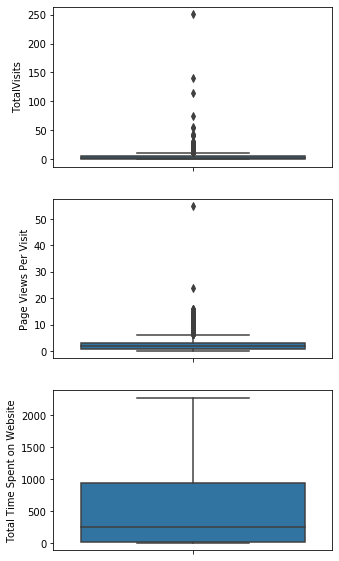

In [1101]:
#visualising the outliers

temp = ['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']
plt.figure(figsize = (5,10))
for i in enumerate(temp):
    plt.subplot(3,1,i[0]+1)
    sns.boxplot(y = i[1], data = new_df)

### Outlier treatment

In [1102]:
# capping

q = df['TotalVisits'].quantile(0.95)
df['TotalVisits'][df['TotalVisits']>= q] = q

In [1103]:
# capping

q = df['Total Time Spent on Website'].quantile(0.95)
df['Total Time Spent on Website'][df['Total Time Spent on Website']>= q] = q

In [1104]:
# capping

q = df['Page Views Per Visit'].quantile(0.95)
df['Page Views Per Visit'][df['Page Views Per Visit']>= q] = q

##### Checking for conversion rate

In [1105]:
#checking the rate of conversion in new_df

conversion = (sum(new_df['Converted'])/len(new_df['Converted'].index))*100
conversion

38.53896103896104

### Splitting dataset into test/train datasets

In [1106]:
from sklearn.model_selection import train_test_split

#storing the feature variables

X = new_df.drop(['Lead Number', 'Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.00,0,0.00,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,5.00,674,2.50,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.00,1532,2.00,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.00,305,1.00,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,2.00,1428,1.00,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [1107]:
#storing the response variable

y = new_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1108]:
#splitting the available dataset into train data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the continous variables


In [1109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #initialising an object

X_train[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-0.66,-0.89,-1.09,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
6795,0.10,0.01,-0.47,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,0.29,-0.69,0.07,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8105,0.29,1.37,1.22,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3934,-0.66,-0.89,-1.09,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### Correlation matrix


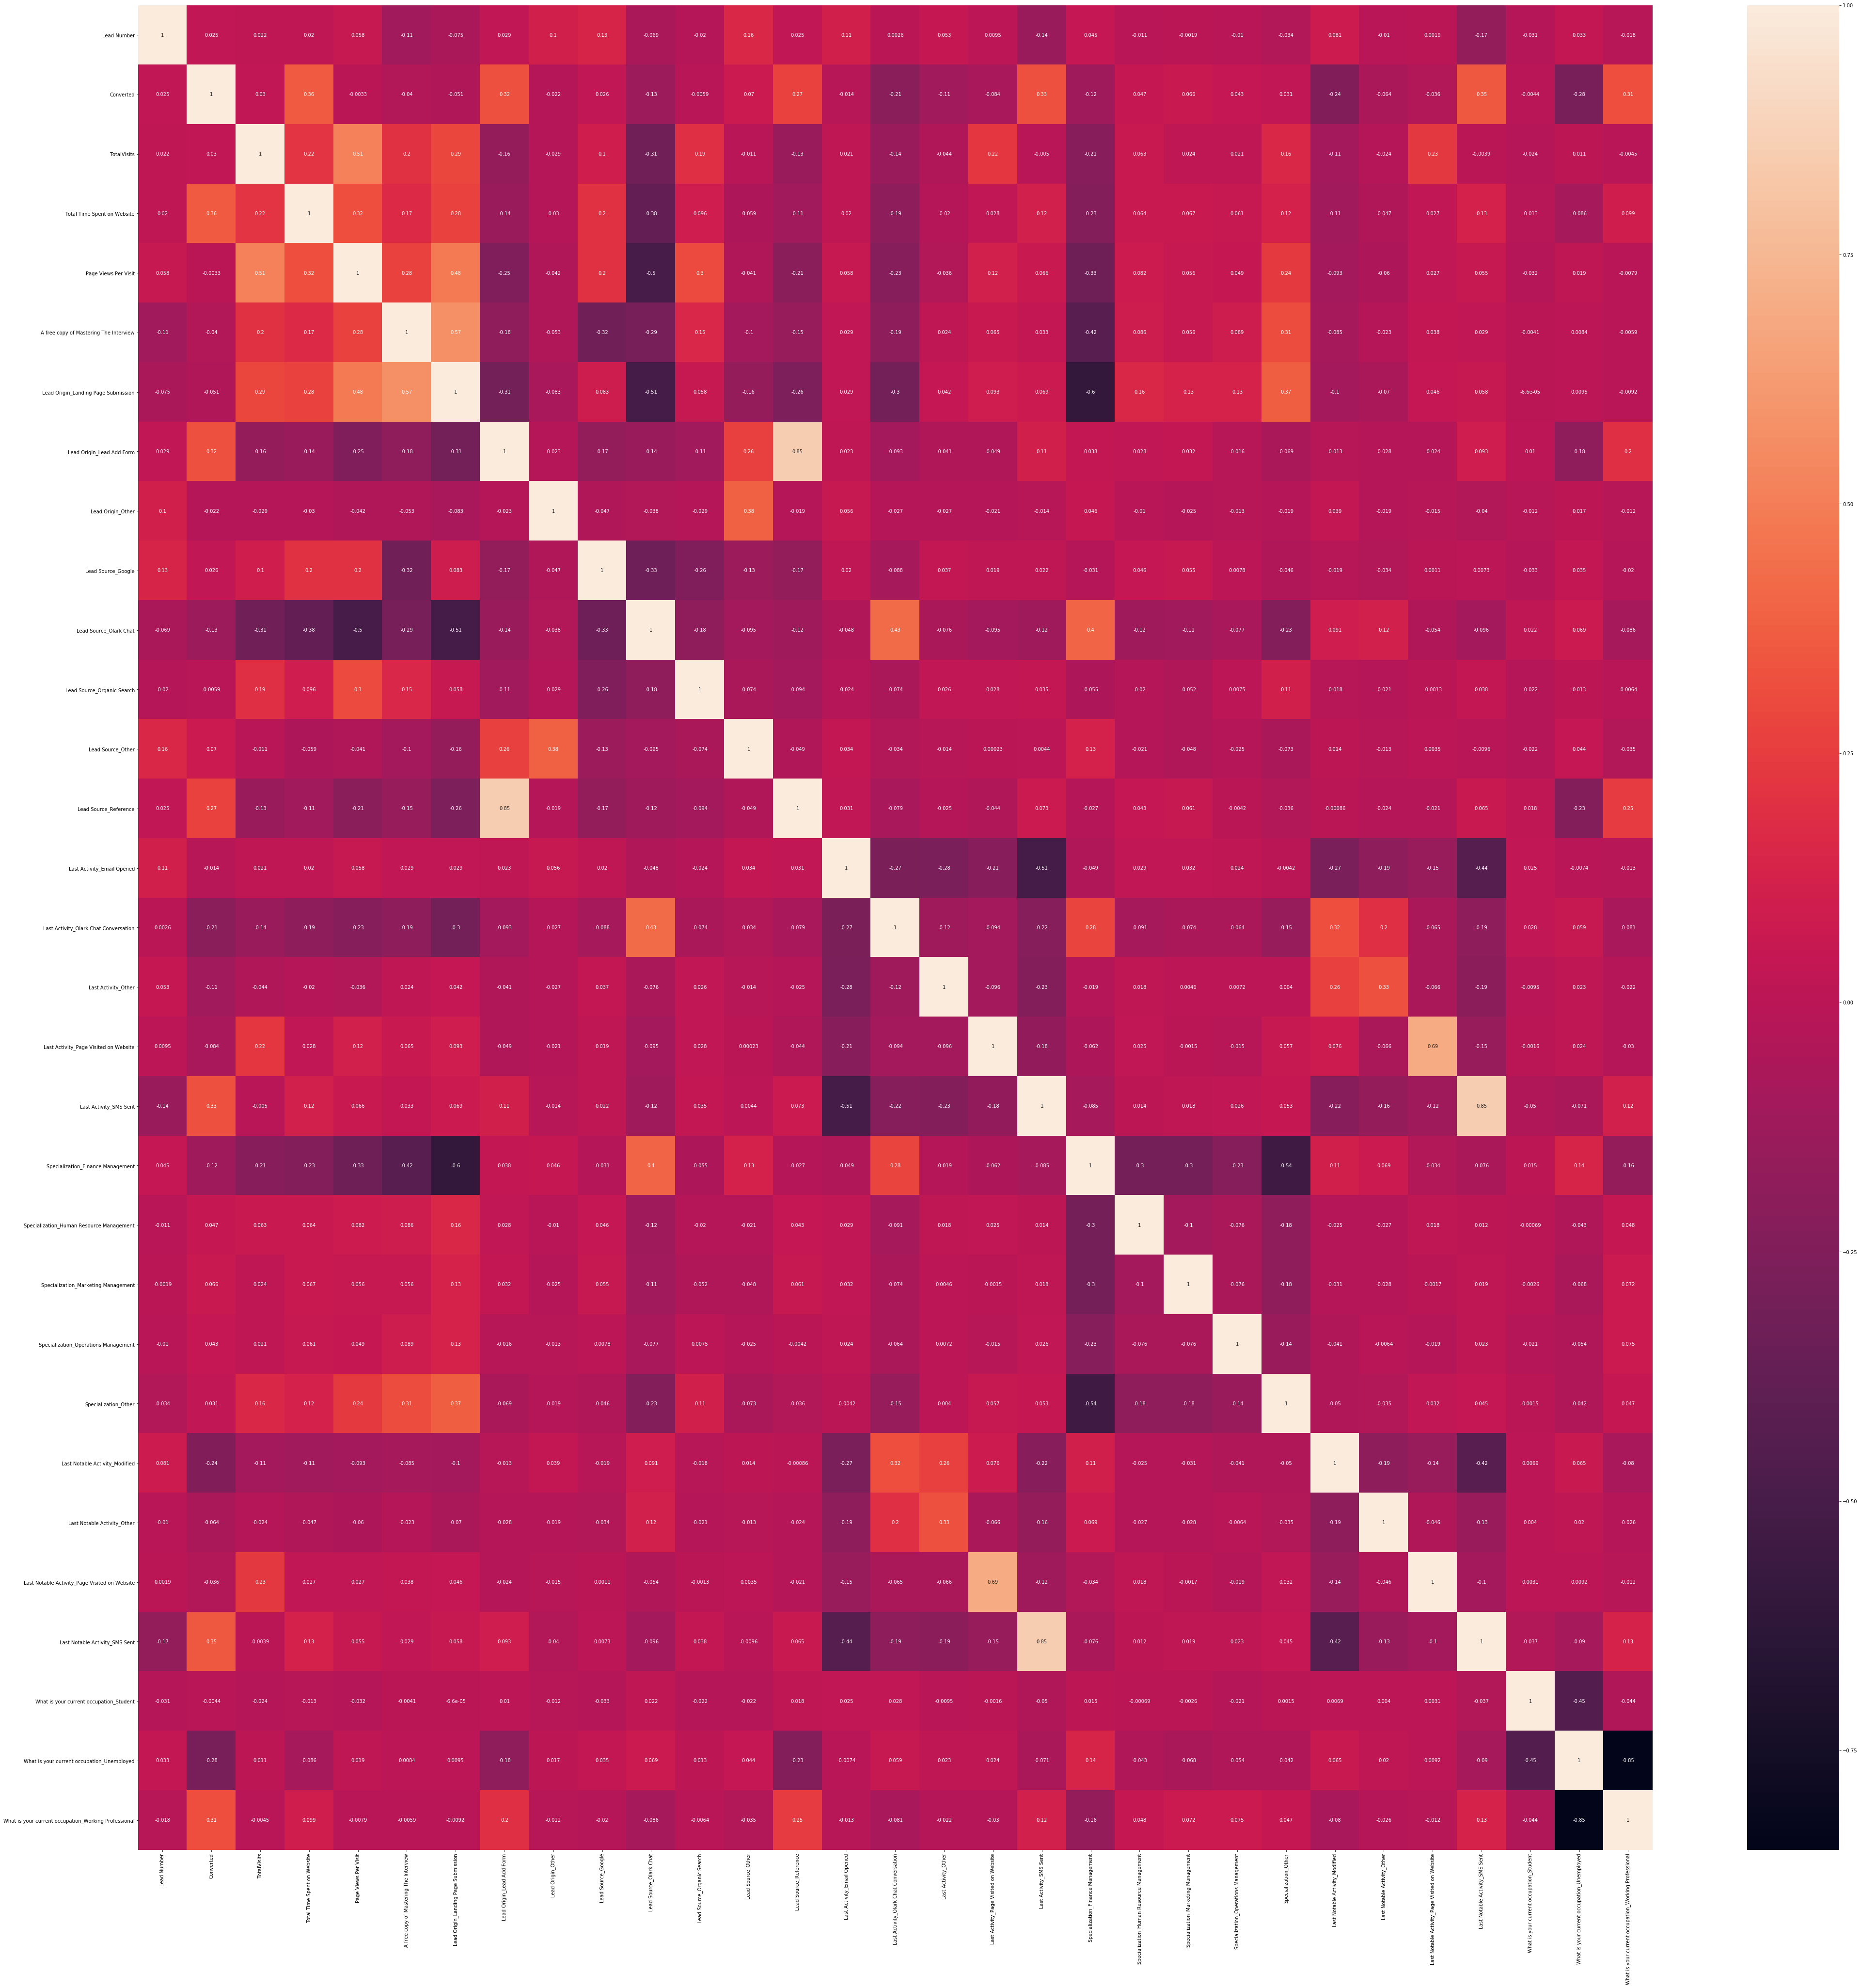

In [1110]:
plt.figure(figsize = (70,70))
sns.heatmap(new_df.corr(),annot = True)
plt.show()

## Modelling of the data

In [1111]:
import statsmodels.api as sm

# running first train model for logistic regression

log_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2685.4
Date:                Sun, 06 Sep 2020   Deviance:                       5370.9
Time:                        21:38:19   Pearson chi2:                 7.25e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8376      0.650     -2.826      0.005      -3.112      -0.563
TotalVisits                                              0.1717      0.053      3.226      0.001       0.067       0.276
Total Time Spent on Website                              1.0851      0.039     27.491      0.000       1.008       1.162
Page Views Per Visit                                    -0.1486      0.053     -2.805      0.005      -0.252      -0.045
A free copy of Mastering The Interview                  -0.0656      0.105     -0.623      0.533      -0.272       0.141
Lead Origin_Landing Page Submission                     -0.3699      0.116     -3.187      0.001      -0.597      -0.142
Lead Origin_Lead Add Form                                4.0034      0.420      9.527      0.000       3.180       4.827
Lead Origin_Other                                       -0.2531      0.542     -0.467      0.641      -1.315       0.809
Lead Source_Google                                       0.3791      0.112      3.394      0.001       0.160       0.598
Lead Source_Olark Chat                                   1.1889      0.158      7.539      0.000       0.880       1.498
Lead Source_Organic Search                               0.2136      0.128      1.673      0.094      -0.037       0.464
Lead Source_Other                                        0.4469      0.269      1.663      0.096      -0.080       0.974
Lead Source_Reference                                   -0.3661      0.467     -0.784      0.433      -1.281       0.549
Last Activity_Email Opened                               2.0410      0.323      6.315      0.000       1.408       2.674
Last Activity_Olark Chat Conversation                    0.5658      0.335      1.690      0.091      -0.090       1.222
Last Activity_Other                                      1.3691      0.314      4.355      0.000       0.753       1.985
Last Activity_Page Visited on Website                    1.2825      0.366      3.507      0.000       0.566       1.999
Last Activity_SMS Sent                                   2.3700      0.325      7.303      0.000       1.734       3.006
Specialization_Finance Management                       -0.3027      0.179     -1.688      0.091      -0.654       0.049
Specialization_Human Resource Management                 0.0797      0.195      0.409      0.683      -0.303       0.462
Specialization_Marketing Management                      0.1529      0.195      0.783      0.433      -0.230       0.536
Specialization_Operations Management                     0.0995      0.217      0.459      0.646      -0.325       0.524
Specialization_Other                                     0

Here, we can see that the model generated has some variables with low p-values. There are several variables also present in the model that have extremely high p-values. However, treating one variable at a time and analysing the model repetitively will take a lot of time. Therefore, we will perform RFE first to select some variables automatically first and then fine-tune the model.

### Feature Selection Using RFE

Since the number of variables is very high, we will use RFE to select some features for further analysis. 

In [1112]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

log_reg = LogisticRegression()
rfe = RFE(log_reg, 20)             # running RFE to filter 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1113]:
rfe.support_

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True])

In [1114]:
#all columns from train dataset based on their ranking and selection boolean

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other', True, 1),
 ('Lead Source_Reference', False, 3),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 9),
 ('Specialization_Marketing Management', False, 6),
 ('Specialization_Operations Management', False, 8),
 ('Specialization_Other', False, 7),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Not

In [1115]:
#filtering the columns that are selected

rfe_col = X_train.columns[rfe.support_] 

In [1116]:
 #the columns that are not selected
    
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Reference', 'Last Activity_Olark Chat Conversation',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### Modelling based on RFE features

In [1117]:
#checking the statistics of the second model created from the features obtained from RFE

X_train_sm = sm.add_constant(X_train[rfe_col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
stats = log_model2.fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.1
Date:                Sun, 06 Sep 2020   Deviance:                       5384.2
Time:                        21:38:24   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2494      0.578     -2.160      0.031      -2.383      -0.116
TotalVisits                                              0.1209      0.040      3.003      0.003       0.042       0.200
Total Time Spent on Website                              1.0774      0.039     27.449      0.000       1.000       1.154
Lead Origin_Landing Page Submission                     -0.4338      0.110     -3.928      0.000      -0.650      -0.217
Lead Origin_Lead Add Form                                3.8136      0.206     18.489      0.000       3.409       4.218
Lead Origin_Other                                       -0.2530      0.535     -0.473      0.636      -1.301       0.795
Lead Source_Google                                       0.3961      0.092      4.289      0.000       0.215       0.577
Lead Source_Olark Chat                                   1.3302      0.147      9.070      0.000       1.043       1.618
Lead Source_Organic Search                               0.1522      0.121      1.258      0.208      -0.085       0.389
Lead Source_Other                                        0.5158      0.228      2.260      0.024       0.068       0.963
Last Activity_Email Opened                               1.5483      0.189      8.171      0.000       1.177       1.920
Last Activity_Other                                      0.9579      0.183      5.241      0.000       0.600       1.316
Last Activity_Page Visited on Website                    0.9142      0.218      4.188      0.000       0.486       1.342
Last Activity_SMS Sent                                   1.9201      0.200      9.618      0.000       1.529       2.311
Specialization_Finance Management                       -0.3900      0.090     -4.342      0.000      -0.566      -0.214
Last Notable Activity_Modified                          -0.4090      0.123     -3.315      0.001      -0.651      -0.167
Last Notable Activity_Other                              0.4716      0.224      2.106      0.035       0.033       0.911
Last Notable Activity_SMS Sent                           0.9098      0.188      4.829      0.000       0.541       1.279
What is your current occupation_Student                 -0.9134      0.584     -1.564      0.118      -2.058       0.231
What is your current occupation_Unemployed              -1.3269      0.536     -2.477      0.013      -2.377      -0.277
What is your current occupation_Working Professional     1.4787      0.565      2.616      0.009       0.371       2.586
========================================================================================================================
"""

In [1118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs

model_col = ["TotalVisits"
,"Total Time Spent on Website"
,"Lead Origin_Landing Page Submission"
,"Lead Origin_Lead Add Form"
,"Lead Origin_Other"
,"Lead Source_Google"
,"Lead Source_Olark Chat"
,"Lead Source_Organic Search"
,"Lead Source_Other"
,"Last Activity_Email Opened"
,"Last Activity_Other"
,"Last Activity_Page Visited on Website"
,"Last Activity_SMS Sent"
,"Specialization_Finance Management"
,"Last Notable Activity_Modified"
,"Last Notable Activity_Other"
,"Last Notable Activity_SMS Sent"
,"What is your current occupation_Student"
,"What is your current occupation_Unemployed"
,"What is your current occupation_Working Professional"]
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,28.85
16,Last Notable Activity_SMS Sent,7.76
12,Last Activity_SMS Sent,7.67
9,Last Activity_Email Opened,7.19
2,Lead Origin_Landing Page Submission,5.49
14,Last Notable Activity_Modified,4.55
19,What is your current occupation_Working Profes...,3.37
6,Lead Source_Olark Chat,3.34
13,Specialization_Finance Management,3.25
5,Lead Source_Google,2.42


The VIF for 'What is your current occupation_Unemployed' is very high hence removing it right away

In [1119]:
#removing What is your current occupation_Unemployed Feature and analysing new model

X_train_sm2 = X_train_sm.drop("What is your current occupation_Unemployed", 1)
log_model3 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
stats2 = log_model3.fit()
stats2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.2
Date:                Sun, 06 Sep 2020   Deviance:                       5390.4
Time:                        21:38:24   Pearson chi2:                 7.37e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5662      0.234    -10.979      0.000      -3.024      -2.108
TotalVisits                                              0.1221      0.041      3.009      0.003       0.043       0.202
Total Time Spent on Website                              1.0789      0.039     27.507      0.000       1.002       1.156
Lead Origin_Landing Page Submission                     -0.4378      0.110     -3.966      0.000      -0.654      -0.221
Lead Origin_Lead Add Form                                3.8249      0.206     18.552      0.000       3.421       4.229
Lead Origin_Other                                       -0.2501      0.535     -0.467      0.640      -1.299       0.799
Lead Source_Google                                       0.3904      0.092      4.230      0.000       0.209       0.571
Lead Source_Olark Chat                                   1.3228      0.147      9.026      0.000       1.036       1.610
Lead Source_Organic Search                               0.1511      0.121      1.249      0.212      -0.086       0.388
Lead Source_Other                                        0.5011      0.228      2.196      0.028       0.054       0.948
Last Activity_Email Opened                               1.5515      0.189      8.194      0.000       1.180       1.923
Last Activity_Other                                      0.9592      0.183      5.252      0.000       0.601       1.317
Last Activity_Page Visited on Website                    0.9245      0.218      4.238      0.000       0.497       1.352
Last Activity_SMS Sent                                   1.9090      0.200      9.565      0.000       1.518       2.300
Specialization_Finance Management                       -0.3935      0.090     -4.382      0.000      -0.570      -0.218
Last Notable Activity_Modified                          -0.4016      0.123     -3.262      0.001      -0.643      -0.160
Last Notable Activity_Other                              0.4778      0.223      2.139      0.032       0.040       0.916
Last Notable Activity_SMS Sent                           0.9182      0.188      4.877      0.000       0.549       1.287
What is your current occupation_Student                  0.4068      0.239      1.703      0.089      -0.061       0.875
What is your current occupation_Working Professional     2.7974      0.190     14.712      0.000       2.425       3.170
========================================================================================================================
"""

In [1120]:
rfe_col=rfe_col.drop("What is your current occupation_Unemployed", 1)

###### Checking the accuracy 

In [1121]:
# Getting the predicted values on the train set

y_train_pred = stats2.predict(X_train_sm2)
y_train_pred[:10]

1871   0.33
6795   0.14
3516   0.31
8105   0.85
3934   0.18
4844   0.99
3297   0.12
8071   0.99
987    0.21
7423   0.92
dtype: float64

In [1122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32576777, 0.13850936, 0.31086114, 0.84836184, 0.179086  ,
       0.99045978, 0.11842789, 0.98701549, 0.21339461, 0.91507913])

In [1123]:
#creating a dataframe with the conversion probability and the 'Converted' column of the original dataset

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['Score'] = y_train_pred_final['Conversion_Prob']*100
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Score
0,0,0.33,1871,32.58
1,0,0.14,6795,13.85
2,0,0.31,3516,31.09
3,0,0.85,8105,84.84
4,0,0.18,3934,17.91


In [1124]:
y_train_pred_final['Conversion_Pred'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Score,Conversion_Pred
0,0,0.33,1871,32.58,0
1,0,0.14,6795,13.85,0
2,0,0.31,3516,31.09,0
3,0,0.85,8105,84.84,1
4,0,0.18,3934,17.91,0


Checking Accuracy

In [1125]:
from sklearn import metrics

In [1126]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred )
print(confusion)

[[3551  451]
 [ 721 1745]]


In [1127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Conversion_Pred))

0.8188002473716759


In [1128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ["TotalVisits"
,"Total Time Spent on Website"
,"Lead Origin_Landing Page Submission"
,"Lead Origin_Lead Add Form"
,"Lead Origin_Other"
,"Lead Source_Google"
,"Lead Source_Olark Chat"
,"Lead Source_Organic Search"
,"Lead Source_Other"
,"Last Activity_Email Opened"
,"Last Activity_Other"
,"Last Activity_Page Visited on Website"
,"Last Activity_SMS Sent"
,"Specialization_Finance Management"
,"Last Notable Activity_Modified"
,"Last Notable Activity_Other"
,"Last Notable Activity_SMS Sent"
,"What is your current occupation_Student"
,"What is your current occupation_Working Professional"]
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Activity_SMS Sent,7.00
16,Last Notable Activity_SMS Sent,6.86
2,Lead Origin_Landing Page Submission,4.03
9,Last Activity_Email Opened,3.67
14,Last Notable Activity_Modified,3.12
13,Specialization_Finance Management,2.85
6,Lead Source_Olark Chat,2.64
5,Lead Source_Google,2.16
3,Lead Origin_Lead Add Form,1.82
10,Last Activity_Other,1.75


Again removing the column "Last Activity_SMS Sent" since it is having high VIF

In [1129]:
#removing "Last Activity_SMS Sent" given column and analysing new model

X_train_sm3 = X_train_sm2.drop("Last Activity_SMS Sent", 1)
log_model4 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
stats3 = log_model4.fit()
stats3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.9
Date:                Sun, 06 Sep 2020   Deviance:                       5487.9
Time:                        21:38:27   Pearson chi2:                 7.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6174      0.200     -8.095      0.000      -2.009      -1.226
TotalVisits                                              0.1291      0.042      3.061      0.002       0.046       0.212
Total Time Spent on Website                              1.0859      0.039     27.717      0.000       1.009       1.163
Lead Origin_Landing Page Submission                     -0.4022      0.110     -3.668      0.000      -0.617      -0.187
Lead Origin_Lead Add Form                                4.0075      0.208     19.281      0.000       3.600       4.415
Lead Origin_Other                                       -0.0968      0.547     -0.177      0.860      -1.169       0.976
Lead Source_Google                                       0.4060      0.092      4.401      0.000       0.225       0.587
Lead Source_Olark Chat                                   1.2233      0.145      8.458      0.000       0.940       1.507
Lead Source_Organic Search                               0.1496      0.121      1.238      0.216      -0.087       0.386
Lead Source_Other                                        0.4908      0.226      2.176      0.030       0.049       0.933
Last Activity_Email Opened                               0.6022      0.147      4.105      0.000       0.315       0.890
Last Activity_Other                                      0.1599      0.149      1.075      0.282      -0.132       0.451
Last Activity_Page Visited on Website                   -0.0449      0.182     -0.247      0.805      -0.401       0.311
Specialization_Finance Management                       -0.4191      0.089     -4.685      0.000      -0.594      -0.244
Last Notable Activity_Modified                          -0.4072      0.124     -3.275      0.001      -0.651      -0.163
Last Notable Activity_Other                              0.0256      0.213      0.120      0.904      -0.391       0.442
Last Notable Activity_SMS Sent                           1.8748      0.167     11.208      0.000       1.547       2.203
What is your current occupation_Student                  0.3343      0.233      1.433      0.152      -0.123       0.792
What is your current occupation_Working Professional     2.7693      0.189     14.679      0.000       2.400       3.139
========================================================================================================================
"""

In [1130]:
rfe_col=rfe_col.drop("Last Activity_SMS Sent", 1)

In [1131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ["TotalVisits"
,"Total Time Spent on Website"
,"Lead Origin_Landing Page Submission"
,"Lead Origin_Lead Add Form"
,"Lead Origin_Other"
,"Lead Source_Google"
,"Lead Source_Olark Chat"
,"Lead Source_Organic Search"
,"Lead Source_Other"
,"Last Activity_Email Opened"
,"Last Activity_Other"
,"Last Activity_Page Visited on Website"
,"Specialization_Finance Management"
,"Last Notable Activity_Modified"
,"Last Notable Activity_Other"
,"Last Notable Activity_SMS Sent"
,"What is your current occupation_Student"
,"What is your current occupation_Working Professional"]
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.76
9,Last Activity_Email Opened,3.34
15,Last Notable Activity_SMS Sent,3.12
13,Last Notable Activity_Modified,2.96
12,Specialization_Finance Management,2.83
6,Lead Source_Olark Chat,2.63
5,Lead Source_Google,2.11
3,Lead Origin_Lead Add Form,1.76
14,Last Notable Activity_Other,1.59
10,Last Activity_Other,1.58


##### removing the colums which are having high P-Value

In [1132]:
#removing "Lead Source_Organic Search" column and analysing new model

X_train_sm4 = X_train_sm3.drop("Lead Source_Organic Search", 1)
log_model5 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
stats4 = log_model5.fit()
stats4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.7
Date:                Sun, 06 Sep 2020   Deviance:                       5489.4
Time:                        21:38:28   Pearson chi2:                 7.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5444      0.191     -8.100      0.000      -1.918      -1.171
TotalVisits                                              0.1364      0.043      3.150      0.002       0.052       0.221
Total Time Spent on Website                              1.0859      0.039     27.711      0.000       1.009       1.163
Lead Origin_Landing Page Submission                     -0.4346      0.106     -4.082      0.000      -0.643      -0.226
Lead Origin_Lead Add Form                                3.9532      0.203     19.459      0.000       3.555       4.351
Lead Origin_Other                                       -0.1161      0.547     -0.212      0.832      -1.188       0.955
Lead Source_Google                                       0.3527      0.081      4.333      0.000       0.193       0.512
Lead Source_Olark Chat                                   1.1553      0.134      8.644      0.000       0.893       1.417
Lead Source_Other                                        0.4413      0.221      1.996      0.046       0.008       0.874
Last Activity_Email Opened                               0.6007      0.147      4.096      0.000       0.313       0.888
Last Activity_Other                                      0.1634      0.149      1.099      0.272      -0.128       0.455
Last Activity_Page Visited on Website                   -0.0521      0.182     -0.286      0.775      -0.408       0.304
Specialization_Finance Management                       -0.4186      0.089     -4.683      0.000      -0.594      -0.243
Last Notable Activity_Modified                          -0.4085      0.124     -3.286      0.001      -0.652      -0.165
Last Notable Activity_Other                              0.0216      0.213      0.102      0.919      -0.395       0.438
Last Notable Activity_SMS Sent                           1.8767      0.167     11.222      0.000       1.549       2.204
What is your current occupation_Student                  0.3294      0.233      1.414      0.157      -0.127       0.786
What is your current occupation_Working Professional     2.7663      0.188     14.681      0.000       2.397       3.136
========================================================================================================================
"""

In [1133]:
rfe_col=rfe_col.drop("Lead Source_Organic Search", 1)

In [1134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ["TotalVisits"
,"Total Time Spent on Website"
,"Lead Origin_Landing Page Submission"
,"Lead Origin_Lead Add Form"
,"Lead Origin_Other"
,"Lead Source_Google"
,"Lead Source_Olark Chat"
,"Lead Source_Other"
,"Last Activity_Email Opened"
,"Last Activity_Other"
,"Last Activity_Page Visited on Website"
,"Specialization_Finance Management"
,"Last Notable Activity_Modified"
,"Last Notable Activity_Other"
,"Last Notable Activity_SMS Sent"
,"What is your current occupation_Student"
,"What is your current occupation_Working Professional"]
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.73
8,Last Activity_Email Opened,3.06
14,Last Notable Activity_SMS Sent,2.85
11,Specialization_Finance Management,2.79
12,Last Notable Activity_Modified,2.78
6,Lead Source_Olark Chat,2.41
5,Lead Source_Google,1.80
3,Lead Origin_Lead Add Form,1.69
9,Last Activity_Other,1.57
13,Last Notable Activity_Other,1.55


In [1135]:
#removing "Lead Origin_Other" column and analysing new model

X_train_sm5 = X_train_sm4.drop("Lead Origin_Other", 1)
log_model6 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
stats5 = log_model6.fit()
stats5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.7
Date:                Sun, 06 Sep 2020   Deviance:                       5489.5
Time:                        21:38:29   Pearson chi2:                 7.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5451      0.191     -8.104      0.000      -1.919      -1.171
TotalVisits                                              0.1369      0.043      3.161      0.002       0.052       0.222
Total Time Spent on Website                              1.0861      0.039     27.726      0.000       1.009       1.163
Lead Origin_Landing Page Submission                     -0.4329      0.106     -4.078      0.000      -0.641      -0.225
Lead Origin_Lead Add Form                                3.9592      0.201     19.668      0.000       3.565       4.354
Lead Source_Google                                       0.3533      0.081      4.342      0.000       0.194       0.513
Lead Source_Olark Chat                                   1.1575      0.133      8.684      0.000       0.896       1.419
Lead Source_Other                                        0.4248      0.207      2.050      0.040       0.019       0.831
Last Activity_Email Opened                               0.5992      0.146      4.090      0.000       0.312       0.886
Last Activity_Other                                      0.1644      0.149      1.106      0.269      -0.127       0.456
Last Activity_Page Visited on Website                   -0.0525      0.182     -0.289      0.773      -0.409       0.304
Specialization_Finance Management                       -0.4182      0.089     -4.679      0.000      -0.593      -0.243
Last Notable Activity_Modified                          -0.4099      0.124     -3.302      0.001      -0.653      -0.167
Last Notable Activity_Other                              0.0203      0.212      0.096      0.924      -0.396       0.437
Last Notable Activity_SMS Sent                           1.8755      0.167     11.221      0.000       1.548       2.203
What is your current occupation_Student                  0.3296      0.233      1.415      0.157      -0.127       0.786
What is your current occupation_Working Professional     2.7659      0.188     14.680      0.000       2.397       3.135
========================================================================================================================
"""

In [1136]:
rfe_col=rfe_col.drop("Lead Origin_Other", 1)

In [1137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ["TotalVisits"
,"Total Time Spent on Website"
,"Lead Origin_Landing Page Submission"
,"Lead Origin_Lead Add Form"
,"Lead Source_Google"
,"Lead Source_Olark Chat"
,"Lead Source_Other"
,"Last Activity_Email Opened"
,"Last Activity_Other"
,"Last Activity_Page Visited on Website"
,"Specialization_Finance Management"
,"Last Notable Activity_Modified"
,"Last Notable Activity_Other"
,"Last Notable Activity_SMS Sent"
,"What is your current occupation_Student"
,"What is your current occupation_Working Professional"]
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.70
7,Last Activity_Email Opened,3.03
13,Last Notable Activity_SMS Sent,2.84
10,Specialization_Finance Management,2.79
11,Last Notable Activity_Modified,2.76
5,Lead Source_Olark Chat,2.39
4,Lead Source_Google,1.79
3,Lead Origin_Lead Add Form,1.64
8,Last Activity_Other,1.57
12,Last Notable Activity_Other,1.55


In [1138]:
#removing "Last Activity_Page Visited on Website"column and analysing new model

X_train_sm6 = X_train_sm5.drop("Last Activity_Page Visited on Website", 1)
log_model7 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial())
stats6 = log_model7.fit()
stats6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.8
Date:                Sun, 06 Sep 2020   Deviance:                       5489.6
Time:                        21:38:29   Pearson chi2:                 7.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5717      0.167     -9.421      0.000      -1.899      -1.245
TotalVisits                                              0.1347      0.042      3.179      0.001       0.052       0.218
Total Time Spent on Website                              1.0858      0.039     27.734      0.000       1.009       1.163
Lead Origin_Landing Page Submission                     -0.4331      0.106     -4.080      0.000      -0.641      -0.225
Lead Origin_Lead Add Form                                3.9592      0.201     19.666      0.000       3.565       4.354
Lead Source_Google                                       0.3531      0.081      4.340      0.000       0.194       0.513
Lead Source_Olark Chat                                   1.1583      0.133      8.694      0.000       0.897       1.419
Lead Source_Other                                        0.4242      0.207      2.048      0.041       0.018       0.830
Last Activity_Email Opened                               0.6236      0.120      5.209      0.000       0.389       0.858
Last Activity_Other                                      0.1758      0.143      1.226      0.220      -0.105       0.457
Specialization_Finance Management                       -0.4176      0.089     -4.675      0.000      -0.593      -0.243
Last Notable Activity_Modified                          -0.3971      0.116     -3.432      0.001      -0.624      -0.170
Last Notable Activity_Other                              0.0401      0.201      0.199      0.842      -0.354       0.434
Last Notable Activity_SMS Sent                           1.9019      0.140     13.615      0.000       1.628       2.176
What is your current occupation_Student                  0.3298      0.233      1.415      0.157      -0.127       0.787
What is your current occupation_Working Professional     2.7648      0.188     14.682      0.000       2.396       3.134
========================================================================================================================
"""

In [1139]:
rfe_col=rfe_col.drop("Last Activity_Page Visited on Website", 1)

In [1140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ["TotalVisits"
,"Total Time Spent on Website"
,"Lead Origin_Landing Page Submission"
,"Lead Origin_Lead Add Form"
,"Lead Source_Google"
,"Lead Source_Olark Chat"
,"Lead Source_Other"
,"Last Activity_Email Opened"
,"Last Activity_Other"
,"Specialization_Finance Management"
,"Last Notable Activity_Modified"
,"Last Notable Activity_Other"
,"Last Notable Activity_SMS Sent"
,"What is your current occupation_Student"
,"What is your current occupation_Working Professional"]
vif = pd.DataFrame()
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.23
10,Last Notable Activity_Modified,2.74
9,Specialization_Finance Management,2.69
7,Last Activity_Email Opened,2.67
12,Last Notable Activity_SMS Sent,2.58
5,Lead Source_Olark Chat,2.34
4,Lead Source_Google,1.76
3,Lead Origin_Lead Add Form,1.59
11,Last Notable Activity_Other,1.53
8,Last Activity_Other,1.52


In [1141]:
#removing "Last Notable Activity_Other" column and analysing new model

X_train_sm7 = X_train_sm6.drop("Last Notable Activity_Other", 1)
log_model8 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial())
stats7 = log_model8.fit()
stats7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.8
Date:                Sun, 06 Sep 2020   Deviance:                       5489.6
Time:                        21:38:30   Pearson chi2:                 7.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5593      0.155    -10.070      0.000      -1.863      -1.256
TotalVisits                                              0.1342      0.042      3.174      0.002       0.051       0.217
Total Time Spent on Website                              1.0859      0.039     27.739      0.000       1.009       1.163
Lead Origin_Landing Page Submission                     -0.4332      0.106     -4.081      0.000      -0.641      -0.225
Lead Origin_Lead Add Form                                3.9606      0.201     19.685      0.000       3.566       4.355
Lead Source_Google                                       0.3533      0.081      4.344      0.000       0.194       0.513
Lead Source_Olark Chat                                   1.1601      0.133      8.727      0.000       0.900       1.421
Lead Source_Other                                        0.4249      0.207      2.051      0.040       0.019       0.831
Last Activity_Email Opened                               0.6127      0.106      5.753      0.000       0.404       0.821
Last Activity_Other                                      0.1838      0.138      1.335      0.182      -0.086       0.454
Specialization_Finance Management                       -0.4171      0.089     -4.671      0.000      -0.592      -0.242
Last Notable Activity_Modified                          -0.4093      0.099     -4.154      0.000      -0.602      -0.216
Last Notable Activity_SMS Sent                           1.8890      0.124     15.264      0.000       1.646       2.132
What is your current occupation_Student                  0.3286      0.233      1.410      0.158      -0.128       0.785
What is your current occupation_Working Professional     2.7644      0.188     14.682      0.000       2.395       3.133
========================================================================================================================
"""

In [1142]:
rfe_col=rfe_col.drop("Last Notable Activity_Other", 1)

In [1143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ["TotalVisits"
,"Total Time Spent on Website"
,"Lead Origin_Landing Page Submission"
,"Lead Origin_Lead Add Form"
,"Lead Source_Google"
,"Lead Source_Olark Chat"
,"Lead Source_Other"
,"Last Activity_Email Opened"
,"Last Activity_Other"
,"Specialization_Finance Management"
,"Last Notable Activity_Modified"
,"Last Notable Activity_SMS Sent"
,"What is your current occupation_Student"
,"What is your current occupation_Working Professional"]
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.91
9,Specialization_Finance Management,2.56
7,Last Activity_Email Opened,2.42
11,Last Notable Activity_SMS Sent,2.31
10,Last Notable Activity_Modified,2.22
5,Lead Source_Olark Chat,2.14
4,Lead Source_Google,1.73
3,Lead Origin_Lead Add Form,1.53
8,Last Activity_Other,1.33
1,Total Time Spent on Website,1.26


In [1144]:
#removing "Last Activity_Other" column and analysing new model

X_train_sm8 = X_train_sm7.drop("Last Activity_Other", 1)
log_model9 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial())
stats8 = log_model9.fit()
stats8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.7
Date:                Sun, 06 Sep 2020   Deviance:                       5491.4
Time:                        21:38:31   Pearson chi2:                 7.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4982      0.148    -10.148      0.000      -1.788      -1.209
TotalVisits                                              0.1277      0.041      3.106      0.002       0.047       0.208
Total Time Spent on Website                              1.0848      0.039     27.720      0.000       1.008       1.161
Lead Origin_Landing Page Submission                     -0.4317      0.106     -4.064      0.000      -0.640      -0.223
Lead Origin_Lead Add Form                                3.9502      0.201     19.678      0.000       3.557       4.344
Lead Source_Google                                       0.3536      0.081      4.345      0.000       0.194       0.513
Lead Source_Olark Chat                                   1.1445      0.132      8.653      0.000       0.885       1.404
Lead Source_Other                                        0.4294      0.207      2.070      0.038       0.023       0.836
Last Activity_Email Opened                               0.5563      0.097      5.715      0.000       0.366       0.747
Specialization_Finance Management                       -0.4195      0.089     -4.696      0.000      -0.595      -0.244
Last Notable Activity_Modified                          -0.4155      0.098     -4.222      0.000      -0.608      -0.223
Last Notable Activity_SMS Sent                           1.8307      0.115     15.869      0.000       1.605       2.057
What is your current occupation_Student                  0.3212      0.233      1.379      0.168      -0.135       0.778
What is your current occupation_Working Professional     2.7749      0.188     14.730      0.000       2.406       3.144
========================================================================================================================
"""

In [1145]:
rfe_col=rfe_col.drop("Last Activity_Other", 1)

In [1146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ["TotalVisits"
,"Total Time Spent on Website"
,"Lead Origin_Landing Page Submission"
,"Lead Origin_Lead Add Form"
,"Lead Source_Google"
,"Lead Source_Olark Chat"
,"Lead Source_Other"
,"Last Activity_Email Opened"
,"Specialization_Finance Management"
,"Last Notable Activity_Modified"
,"Last Notable Activity_SMS Sent"
,"What is your current occupation_Student"
,"What is your current occupation_Working Professional"]
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.70
8,Specialization_Finance Management,2.51
7,Last Activity_Email Opened,2.24
10,Last Notable Activity_SMS Sent,2.21
9,Last Notable Activity_Modified,2.19
5,Lead Source_Olark Chat,2.13
4,Lead Source_Google,1.70
3,Lead Origin_Lead Add Form,1.52
1,Total Time Spent on Website,1.26
12,What is your current occupation_Working Profes...,1.18


In [1147]:
#removing "What is your current occupation_Student" column and analysing new model

X_train_sm9 = X_train_sm8.drop("What is your current occupation_Student", 1)
log_model10 = sm.GLM(y_train,X_train_sm9, family = sm.families.Binomial())
stats9 = log_model10.fit()
stats9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.6
Date:                Sun, 06 Sep 2020   Deviance:                       5493.2
Time:                        21:38:32   Pearson chi2:                 7.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4931      0.148    -10.120      0.000      -1.782      -1.204
TotalVisits                                              0.1272      0.041      3.099      0.002       0.047       0.208
Total Time Spent on Website                              1.0848      0.039     27.724      0.000       1.008       1.161
Lead Origin_Landing Page Submission                     -0.4294      0.106     -4.044      0.000      -0.638      -0.221
Lead Origin_Lead Add Form                                3.9541      0.201     19.708      0.000       3.561       4.347
Lead Source_Google                                       0.3520      0.081      4.328      0.000       0.193       0.511
Lead Source_Olark Chat                                   1.1476      0.132      8.679      0.000       0.888       1.407
Lead Source_Other                                        0.4245      0.207      2.047      0.041       0.018       0.831
Last Activity_Email Opened                               0.5583      0.097      5.738      0.000       0.368       0.749
Specialization_Finance Management                       -0.4177      0.089     -4.677      0.000      -0.593      -0.243
Last Notable Activity_Modified                          -0.4168      0.098     -4.236      0.000      -0.610      -0.224
Last Notable Activity_SMS Sent                           1.8278      0.115     15.855      0.000       1.602       2.054
What is your current occupation_Working Professional     2.7679      0.188     14.701      0.000       2.399       3.137
========================================================================================================================
"""

In [1148]:
rfe_col=rfe_col.drop("What is your current occupation_Student", 1)

In [1149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ["TotalVisits"
,"Total Time Spent on Website"
,"Lead Origin_Landing Page Submission"
,"Lead Origin_Lead Add Form"
,"Lead Source_Google"
,"Lead Source_Olark Chat"
,"Lead Source_Other"
,"Last Activity_Email Opened"
,"Specialization_Finance Management"
,"Last Notable Activity_Modified"
,"Last Notable Activity_SMS Sent"
,"What is your current occupation_Working Professional"]
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.70
8,Specialization_Finance Management,2.51
7,Last Activity_Email Opened,2.24
10,Last Notable Activity_SMS Sent,2.21
9,Last Notable Activity_Modified,2.19
5,Lead Source_Olark Chat,2.13
4,Lead Source_Google,1.70
3,Lead Origin_Lead Add Form,1.52
1,Total Time Spent on Website,1.26
11,What is your current occupation_Working Profes...,1.18


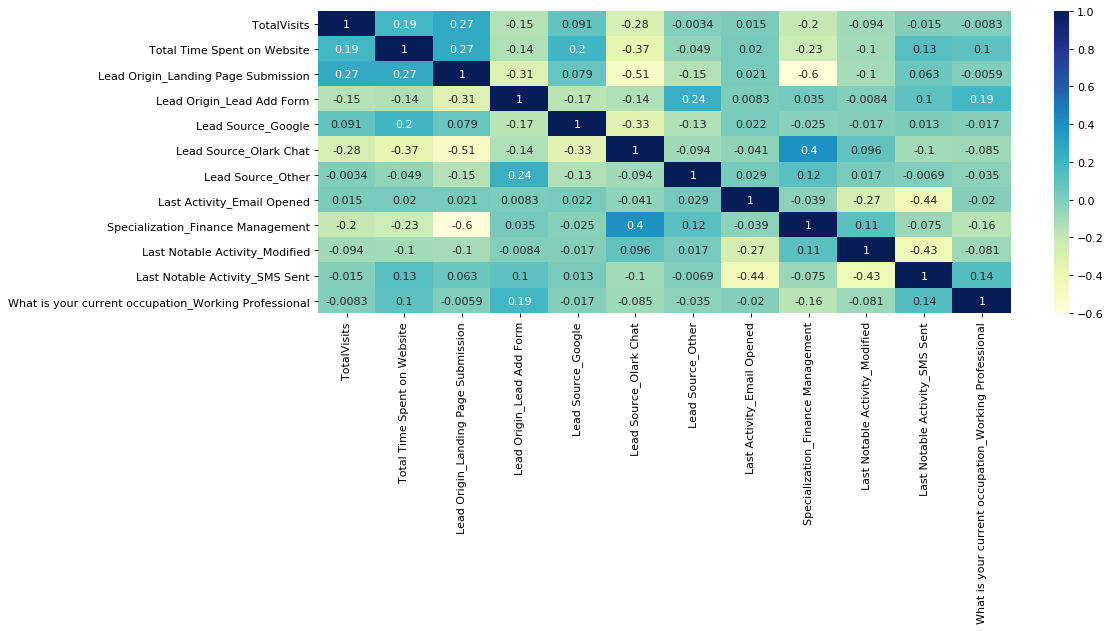

In [1150]:
# Slightly alter the figure size to make it more horizontal.

plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[rfe_col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Our latest model have the following features:
 -All variables have p-value 
 -All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map
 -The overall accuracy of `0.8181` at a probability threshold of 0.05 is also very acceptable which we will see next.
 
So we need not drop any more variables and we can proceed with making predictions using this model only

In [1151]:
y_train_pred=stats9.predict(X_train_sm9)
y_train_pred[:10]

1871   0.30
6795   0.15
3516   0.29
8105   0.86
3934   0.16
4844   0.99
3297   0.11
8071   0.99
987    0.21
7423   0.92
dtype: float64

In [1152]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30335678, 0.14640685, 0.28532094, 0.85507354, 0.15897214,
       0.99104647, 0.11194487, 0.98931108, 0.21325483, 0.91678699])

In [1153]:
#creating a dataframe with the conversion probability and the 'Converted' column of the original dataset
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['Score'] = y_train_pred_final['Conversion_Prob']*100
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Score
0,0,0.30,1871,30.34
1,0,0.15,6795,14.64
2,0,0.29,3516,28.53
3,0,0.86,8105,85.51
4,0,0.16,3934,15.90


In [1154]:
y_train_pred_final['Conversion_Pred'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Score,Conversion_Pred
0,0,0.30,1871,30.34,0
1,0,0.15,6795,14.64,0
2,0,0.29,3516,28.53,0
3,0,0.86,8105,85.51,1
4,0,0.16,3934,15.90,0


Checking for accuracy at 0.5

In [1155]:
from sklearn import metrics

In [1156]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred )
print(confusion)

[[3567  435]
 [ 741 1725]]


Based on the confusion matrix, we can see that while there are 3567 true negatives, there are 741 false positives. Additionally, this model has generated 1725 true positives and 435 false negatives.

In [1158]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Conversion_Pred))

0.8181818181818182


#### All variables have a good value of VIF means < 5. So, we can proceed with making predictions using this model only.

### Metrics beyond simply accuracy

In [1159]:
TP=confusion[1,1] # true positive
TN=confusion[0,0] # true negative
FP=confusion[0,1] # False positive
FN=confusion[1,0] # False negative

In [1160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6995133819951338

In [1161]:
# Let us calculate specificity
TN / float(TN+FP)

0.8913043478260869

In [947]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.10869565217391304


In [948]:
# positive predictive value 
print (TP / float(TP+FP))

0.7986111111111112


In [949]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8279944289693594


## Determining optimum cut-off probability for conversion

##  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [950]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [951]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

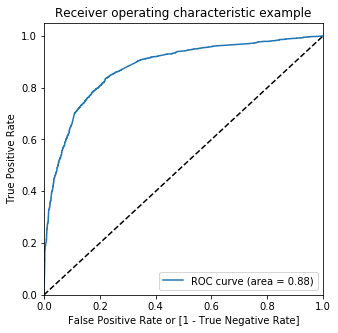

In [952]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Based on the ROC curve above, the area under the curve = 0.88. This implies that the model is a good one.

### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [953]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Score,Conversion_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.303357,1871,30.335678,0,1,1,1,1,0,0,0,0,0,0
1,0,0.146407,6795,14.640685,0,1,1,0,0,0,0,0,0,0,0
2,0,0.285321,3516,28.532094,0,1,1,1,0,0,0,0,0,0,0
3,0,0.855074,8105,85.507354,1,1,1,1,1,1,1,1,1,1,0
4,0,0.158972,3934,15.897214,0,1,1,0,0,0,0,0,0,0,0


#### Let's plot accuracy sensitivity and specificity for various probabilities.

In [954]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.602195  0.961882  0.380560
0.2   0.2  0.749227  0.908354  0.651174
0.3   0.3  0.800247  0.835766  0.778361
0.4   0.4  0.812461  0.758719  0.845577
0.5   0.5  0.818182  0.699513  0.891304
0.6   0.6  0.797464  0.591241  0.924538
0.7   0.7  0.781694  0.513788  0.946777
0.8   0.8  0.757730  0.415247  0.968766
0.9   0.9  0.713822  0.268856  0.988006


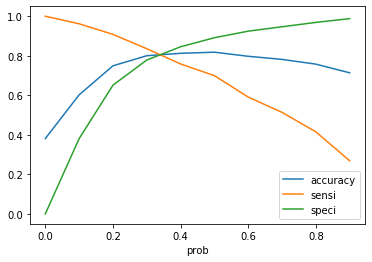

In [955]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [956]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,Score,Conversion_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.303357,1871,30.335678,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.146407,6795,14.640685,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.285321,3516,28.532094,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.855074,8105,85.507354,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.158972,3934,15.897214,0,1,1,0,0,0,0,0,0,0,0,0


In [957]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8002473716759431

###### Confusion Matrix

In [958]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3115,  887],
       [ 405, 2061]], dtype=int64)

In [959]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [960]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8357664233576643

In [961]:
# Let us calculate specificity

TN / float(TN+FP)

0.7783608195902049

In [962]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.2216391804097951


In [963]:
# Positive predictive value 

print (TP / float(TP+FP))

0.6991180461329715


In [964]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8849431818181818


### Precision and Recall

- Looking at the confusion matrix again

In [965]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Conversion_Pred )
confusion

array([[3567,  435],
       [ 741, 1725]], dtype=int64)

#### Precision
TP / TP + FP

In [966]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7986111111111112

#### Recall
TP / TP + FN

In [967]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6995133819951338

In [968]:
from sklearn.metrics import precision_score, recall_score

In [969]:
print("The precision Score: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred))

The precision Score:  0.7986111111111112


In [970]:
print("The recall Score: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred))

The recall Score:  0.6995133819951338


### Precision and recall tradeoff

In [971]:
from sklearn.metrics import precision_recall_curve

In [972]:
y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Conversion_Pred, Length: 6468, dtype: int64)

In [973]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

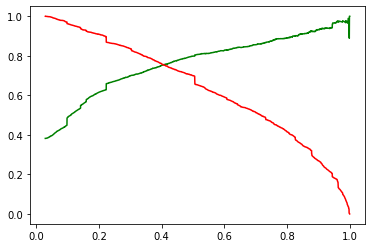

In [974]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to .39. However our business requirement here is to have Lead Conversion Rate around 80%.  

#### This is already achieved with our earlier threshold value of 0.3. So we will stick to this value.

##  Making predictions on the test set

#### Using the scaler function from the train dataset to transfor the test dataset

In [975]:
X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,0.856729,0.964504,2.611381,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2376,-0.657764,-0.885371,-1.088305,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7766,0.288795,-0.777416,1.223999,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
9199,-0.657764,-0.885371,-1.088305,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4359,-0.657764,-0.885371,-1.088305,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [976]:
X_test = X_test[rfe_col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,Last Activity_Email Opened,Specialization_Finance Management,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,What is your current occupation_Working Professional
4269,0.856729,0.964504,0,0,0,0,0,0,1,0,1,0
2376,-0.657764,-0.885371,0,1,0,0,0,0,1,0,1,0
7766,0.288795,-0.777416,0,0,1,0,0,0,0,0,0,1
9199,-0.657764,-0.885371,0,0,0,1,0,0,1,1,0,0
4359,-0.657764,-0.885371,0,1,0,0,0,1,0,0,0,0


In [977]:
# Adding constant

X_test_sm = sm.add_constant(X_test) 

In [978]:
#making predictions on test dataset using the final model

y_test_pred = stats9.predict(X_test_sm) 
y_test_pred[:10]

4269    0.745032
2376    0.944114
7766    0.694280
9199    0.097601
4359    0.878163
9186    0.639312
1631    0.415092
8963    0.191473
8007    0.063320
5324    0.402017
dtype: float64

In [979]:
# Converting y_pred to a dataframe which is an array

y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

In [980]:
#prediction final dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.745032
1,1,2376,0.944114
2,1,7766,0.694280
3,0,9199,0.097601
4,1,4359,0.878163


#### Using the probability threshold value 0f 0.3 on the test dataset to predict if a lead will convert


In [981]:
#renaming the probability column and rearranging similar to train dataset

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final["Score"] = y_pred_final["Conversion_Prob"]*100
y_pred_final['Final_Conversion_Pred'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob','Score','Final_Conversion_Pred'], axis=1)
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,Score,Final_Conversion_Pred
0,4269,1,0.745032,74.503192,1
1,2376,1,0.944114,94.411386,1
2,7766,1,0.694280,69.427963,1
3,9199,0,0.097601,9.760136,0
4,4359,1,0.878163,87.816265,1


In [982]:
y_pred_final.shape

(2772, 5)

In [983]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Conversion_Pred)

0.8008658008658008

In [984]:
# Creating confusion metrics

confusion_test= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Conversion_Pred)
print(confusion_test)

[[1312  365]
 [ 187  908]]


In [985]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### Showcasing the different metrics beyond accuracy on the test dataset

##### Sensitivity
TP / TP + FN

In [986]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8292237442922374

##### Specificity
TN / TN + FP

In [987]:
# Let us calculate specificity

TN / float(TN+FP)

0.7823494335122242

In [988]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.21765056648777578


In [989]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7132757266300078


In [990]:
# Negative predictive value

print (TN / float(TN+ FN))

0.875250166777852


In [991]:
# Precision

Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.7132757266300078

In [992]:
# Recall

Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8292237442922374

##### Classification Report

In [993]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.Final_Conversion_Pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1677
           1       0.71      0.83      0.77      1095

    accuracy                           0.80      2772
   macro avg       0.79      0.81      0.80      2772
weighted avg       0.81      0.80      0.80      2772



##### Cross Validation Score

#### To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [994]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.76190476 0.76839827 0.7965368  0.7987013  0.8008658  0.81168831
 0.81926407 0.82034632 0.83008658 0.83874459]
0.8046536796536797


### Plotting the ROC Curve for Test Dataset


In [995]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [996]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

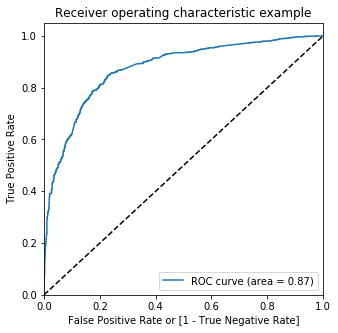

(array([0.        , 0.        , 0.        , ..., 0.99880739, 0.9994037 ,
        1.        ]),
 array([0.00000000e+00, 9.13242009e-04, 1.82648402e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99957277, 0.99957277, 0.99931572, ..., 0.02587622, 0.02572654,
        0.02479799]))

In [997]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

***As a rule of thumb, an AUC can be classed as follows,***

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail
 
***Since we got a value of 0.87, our model seems to be doing good on the test dataset.***

## Determining Feature Importance

In [1010]:
pd.options.display.float_format = '{:.2f}'.format
new_params = stats9.params[1:]
new_params

TotalVisits                                             0.13
Total Time Spent on Website                             1.08
Lead Origin_Landing Page Submission                    -0.43
Lead Origin_Lead Add Form                               3.95
Lead Source_Google                                      0.35
Lead Source_Olark Chat                                  1.15
Lead Source_Other                                       0.42
Last Activity_Email Opened                              0.56
Specialization_Finance Management                      -0.42
Last Notable Activity_Modified                         -0.42
Last Notable Activity_SMS Sent                          1.83
What is your current occupation_Working Professional    2.77
dtype: float64

#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient


In [1011]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                              3.22
Total Time Spent on Website                             27.43
Lead Origin_Landing Page Submission                    -10.86
Lead Origin_Lead Add Form                              100.00
Lead Source_Google                                       8.90
Lead Source_Olark Chat                                  29.02
Lead Source_Other                                       10.74
Last Activity_Email Opened                              14.12
Specialization_Finance Management                      -10.56
Last Notable Activity_Modified                         -10.54
Last Notable Activity_SMS Sent                          46.22
What is your current occupation_Working Professional    70.00
dtype: float64

In [1012]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

TotalVisits                                              2
Total Time Spent on Website                              8
Lead Origin_Landing Page Submission                      9
Lead Origin_Lead Add Form                                0
Lead Source_Google                                       4
Lead Source_Olark Chat                                   6
Lead Source_Other                                        7
Last Activity_Email Opened                               1
Specialization_Finance Management                        5
Last Notable Activity_Modified                          10
Last Notable Activity_SMS Sent                          11
What is your current occupation_Working Professional     3
dtype: int64

#### Plot showing the feature variables based on their relative coefficient values

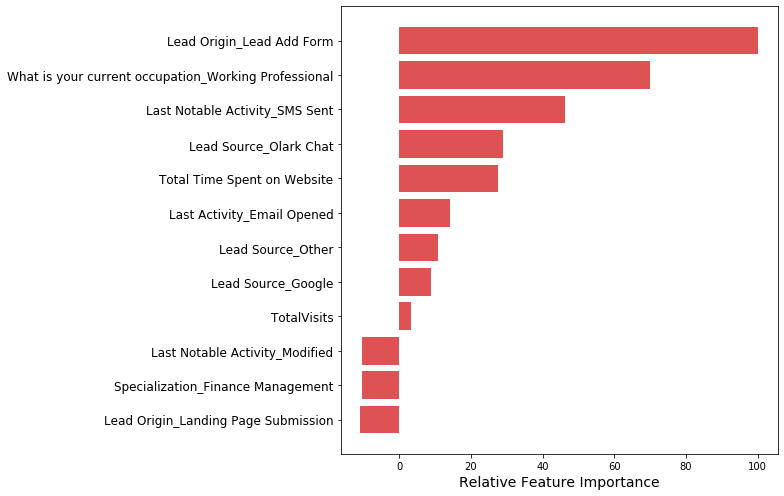

In [1016]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(11,7))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[rfe_col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Selecting `Top 3` features which contribute most towards the probability of a lead getting converted

In [1017]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
3,Lead Origin_Lead Add Form,100.00
11,What is your current occupation_Working Profes...,70.00
10,Last Notable Activity_SMS Sent,46.22


### Conclusion

- The lead scores are assigned to each lead and it will help X Education to identify the potential leads, called as 'Hot    leads'. So that, the company can successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
- The potential leads can be decided on the basis of lead scores now. 
- If the lead score is higher i.e. greater than 80, then the lead is hot and is most likely to convert. 
- If the lead score is low i.e. let's say less than 30, then lead is low and will mostly not get converted.

##### X Education can focus on below criterias of the leads to identify the more potential leads.

- TotalVisits                                              
- Total Time Spent on Website                              
- Lead Origin_Landing Page Submission                      
- Lead Origin_Lead Add Form                                
- Lead Source_Google                                       
- Lead Source_Olark Chat                                   
- Lead Source_Other                                        
- Last Activity_Email Opened                               
- Specialization_Finance Management                        
- Last Notable Activity_Modified                          
- Last Notable Activity_SMS Sent                          
- What is your current occupation_Working Professional    

### After trying several models, we finally chose a model with the following characteristics:

- All variables have p-value < `0.05`. 
- All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.
- The overall accuracy of `0.80` at a probability threshold of 0.3 on the test dataset is also very acceptable.
    

### Based on our model, some features are identified which contribute most to a Lead getting converted successfully. 


#### The conversion probability of a lead increases with increase in values of the following features in descending order:

##### Features with Positive Coefficient Values

- TotalVisits                                              
- Total Time Spent on Website                                                  
- Lead Origin_Lead Add Form                                
- Lead Source_Google                                       
- Lead Source_Olark Chat                                   
- Lead Source_Other                                        
- Last Activity_Email Opened                                                                          
- Last Notable Activity_SMS Sent                          
- What is your current occupation_Working Professional 

#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

##### Features with Negative Coefficient Values
                            
- Lead Origin_Landing Page Submission                                            
- Specialization_Finance Management                        
- Last Notable Activity_Modified                          
   

*** Another point to note here is that, depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model. ***

*** High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected. ***